# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape

(4324, 9)

9 columns and 4324 rows

In [8]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [9]:
df_data.Location

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [10]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [11]:
clean_data = df_data.dropna()

In [12]:
clean_data.shape

(964, 9)

In [13]:
clean_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

In [14]:
clean_data.sort_values('Organisation')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
660,660,660,Arianespace,"ELS, Guiana Space Centre, French Guiana, France","Sat Dec 17, 2011 02:03 UTC","Soyuz ST-A/Fregat | Pl??iades 1A, SSOT, Elisa",StatusActive,80.0,Success
765,765,765,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Jul 01, 2009 19:52 UTC",Ariane 5 ECA | TerreStar-1,StatusActive,200.0,Success
758,758,758,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Aug 21, 2009 22:09 UTC",Ariane 5 ECA | JCSAT-12 & Optus D3,StatusActive,200.0,Success
751,751,751,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Oct 01, 2009 21:59 UTC",Ariane 5 ECA | Amazonas 2 & COMSATBw-1,StatusActive,200.0,Success
747,747,747,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Oct 29, 2009 20:00 UTC",Ariane 5 ECA | NSS-12 & Thor-6,StatusActive,200.0,Success
...,...,...,...,...,...,...,...,...,...
979,979,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Nov 08, 2004 18:29 UTC",Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success
435,435,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Sat Jun 04, 2016 14:00 UTC",Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success
198,198,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Nov 03, 2018 20:17 UTC",Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success
948,948,948,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Aug 26, 2005 18:34 UTC",Rokot/Briz KM | Monitor-E,StatusRetired,41.8,Success


In [15]:
name_frequency = clean_data['Organisation'].value_counts().reset_index()
name_frequency.columns = ['name', 'frequency']
name_frequency.shape
name_frequency.head

<bound method NDFrame.head of                name  frequency
0              CASC        158
1              NASA        149
2            SpaceX         99
3               ULA         98
4       Arianespace         96
5          Northrop         83
6              ISRO         67
7               MHI         37
8            VKS RF         33
9      US Air Force         26
10        Roscosmos         23
11        Kosmotras         22
12              ILS         13
13         Eurockot         13
14       Rocket Lab         13
15  Martin Marietta          9
16         Lockheed          8
17           Boeing          7
18             JAXA          3
19        RVSN USSR          2
20           Sandia          1
21     Virgin Orbit          1
22              ESA          1
23           ExPace          1
24              EER          1>

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<BarContainer object of 24 artists>

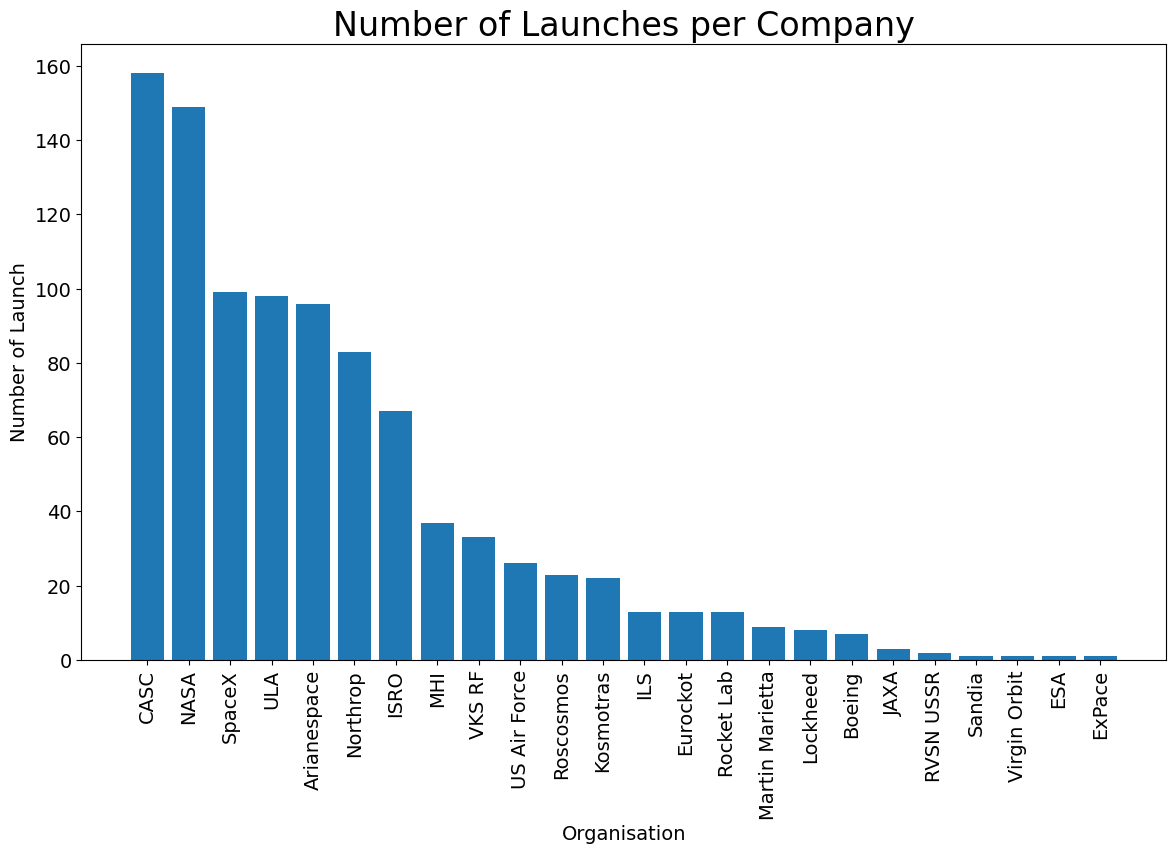

In [16]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Organisation', fontsize=14)
plt.ylabel('Number of Launch', fontsize=14)

plt.title('Number of Launches per Company', fontsize=24)
plt.bar(name_frequency.name[:24], name_frequency.frequency[:24])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [17]:
clean_data.sort_values('Rocket_Status')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
641,641,641,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Fri Jun 29, 2012 13:15 UTC",Delta IV Heavy | NROL-15,StatusActive,350.0,Success
642,642,642,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Wed Jun 20, 2012 12:28 UTC",Atlas V 401 | NROL-38,StatusActive,109.0,Success
644,644,644,Northrop,"Stargazer, Ronald Reagan Ballistic Missile Def...","Wed Jun 13, 2012 16:00 UTC",Pegasus XL | NuSTAR,StatusActive,40.0,Success
648,648,648,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu May 17, 2012 16:39 UTC","H-IIA 202 | Shizuku, KOMPSAT 3 & Others",StatusActive,90.0,Success
...,...,...,...,...,...,...,...,...,...
192,192,192,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Sat Nov 17, 2018 09:01 UTC",Antares 230 | CRS NG-10,StatusRetired,85.0,Success
819,819,819,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri May 23, 2008 15:20 UTC","Rokot/Briz KM | Cosmos 2437 to 2439, Youbilielnyi",StatusRetired,41.8,Success
817,817,817,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat May 31, 2008 21:02 UTC",Space Shuttle Discovery | STS-124,StatusRetired,450.0,Success
805,805,805,Kosmotras,"Site 109/95, Baikonur Cosmodrome, Kazakhstan","Fri Aug 29, 2008 07:15 UTC",Dnepr | RapidEye 1 to 5,StatusRetired,29.0,Success


In [18]:
active_retired = clean_data['Rocket_Status'].value_counts().reset_index()
active_retired.head()

,index,Rocket_Status
0,StatusActive,586
1,StatusRetired,378


In [19]:
active_retired.columns = ['active', 'retired'] #assign column name
active_retired.head

<bound method NDFrame.head of           active  retired
0   StatusActive      586
1  StatusRetired      378>

<BarContainer object of 2 artists>

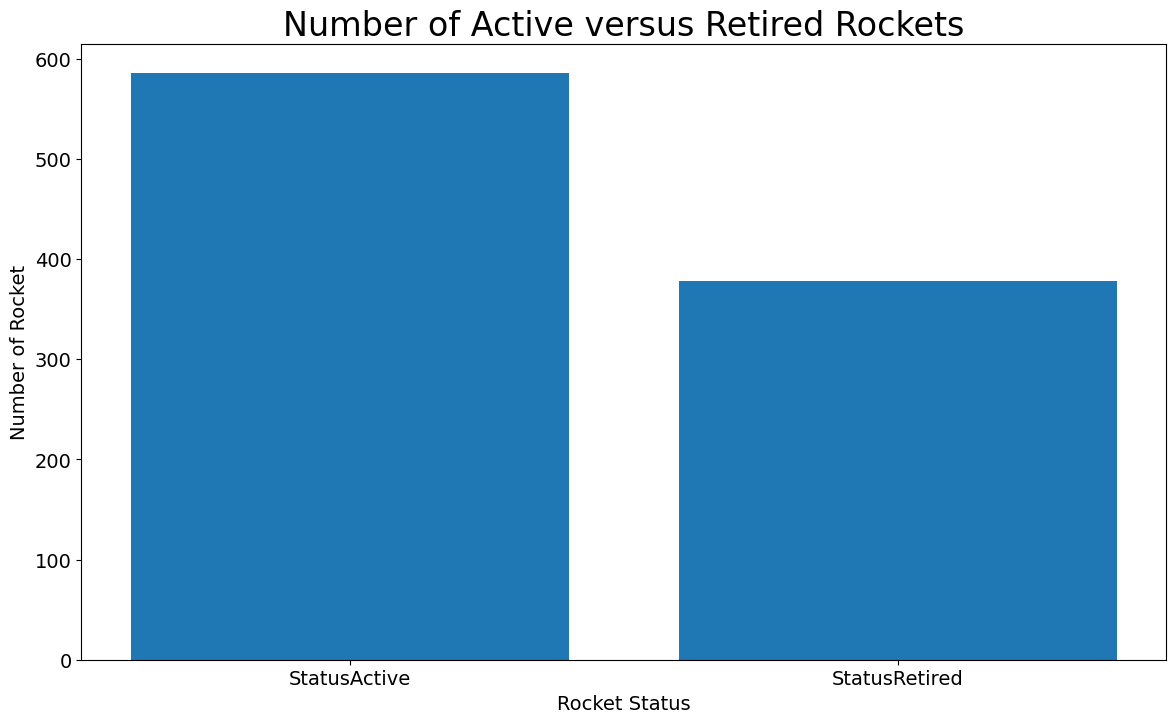

In [20]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Rocket Status', fontsize=14)
plt.ylabel('Number of Rocket', fontsize=14)

plt.title('Number of Active versus Retired Rockets', fontsize=24)
plt.bar(active_retired.active[:24], active_retired.retired[:24])

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [21]:
clean_data.sort_values('Mission_Status')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure
124,124,124,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Thu Jul 11, 2019 01:53 UTC",Vega | Falcon Eye 1,StatusActive,37.0,Failure
137,137,137,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed May 22, 2019 22:55 UTC",Long March 4C | Yaogan Weixing-33,StatusActive,64.68,Failure
1609,1609,1609,ISRO,"First Launch Pad, Satish Dhawan Space Centre, ...","Mon Sep 20, 1993 05:12 UTC",PSLV-G | IRS-P1,StatusRetired,25.0,Failure
1607,1607,1607,Martin Marietta,"SLC-4W, Vandenberg AFB, California, USA","Tue Oct 05, 1993 17:56 UTC",Titan II(23)G | Landsat 6,StatusRetired,35.0,Failure
...,...,...,...,...,...,...,...,...,...
457,457,457,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Fri Mar 04, 2016 23:35 UTC",Falcon 9 Block 3 | SES-9,StatusRetired,62.0,Success
458,458,458,MHI,"LA-Y1, Tanegashima Space Center, Japan","Wed Feb 17, 2016 08:45 UTC","H-IIA 202 | Astro H, Horyu 4 & Kinshachi 2 and 3",StatusActive,90.0,Success
459,459,459,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Feb 16, 2016 17:57 UTC",Rokot/Briz KM | Sentinel-3A,StatusRetired,41.8,Success
445,445,445,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Fri Apr 08, 2016 20:43 UTC",Falcon 9 Block 3 | CRS-8,StatusRetired,62.0,Success


<BarContainer object of 4 artists>

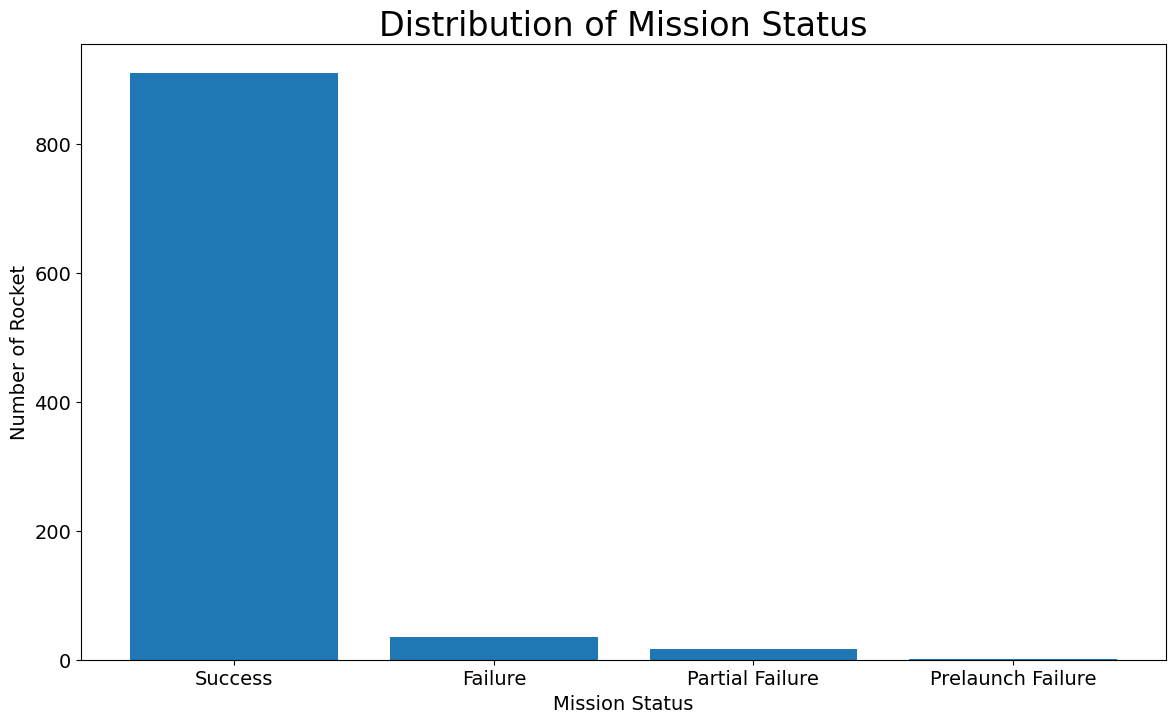

In [22]:
# template for getting data from column and counting its frequency and then making it to a new dataframe for charting purposes
mission_status = clean_data['Mission_Status'].value_counts().reset_index()
mission_status.columns = ['status', 'number'] #assign column name
# charting template
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Mission Status', fontsize=14)
plt.ylabel('Number of Rocket', fontsize=14)

plt.title('Distribution of Mission Status', fontsize=24)
plt.bar(mission_status.status[:24], mission_status.number[:24])

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [23]:
# making a new dataframe
cost = clean_data[['Detail','Price']]
print(cost)

                                                 Detail  Price
0          Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   50.0
1                   Long March 2D | Gaofen-9 04 & Q-SAT  29.75
3          Proton-M/Briz-M | Ekspress-80 & Ekspress-103   65.0
4                            Atlas V 541 | Perseverance  145.0
5     Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...  64.68
...                                                 ...    ...
3855                                  Titan IIIB | KH-8   59.0
3971                         Titan IIIA | LES 2 & LCS 1  63.23
3993                                 Titan IIIA | LES 1  63.23
4000                           Titan IIIA | Transtage 2  63.23
4020                           Titan IIIA | Transtage 1  63.23

[964 rows x 2 columns]


<BarContainer object of 964 artists>

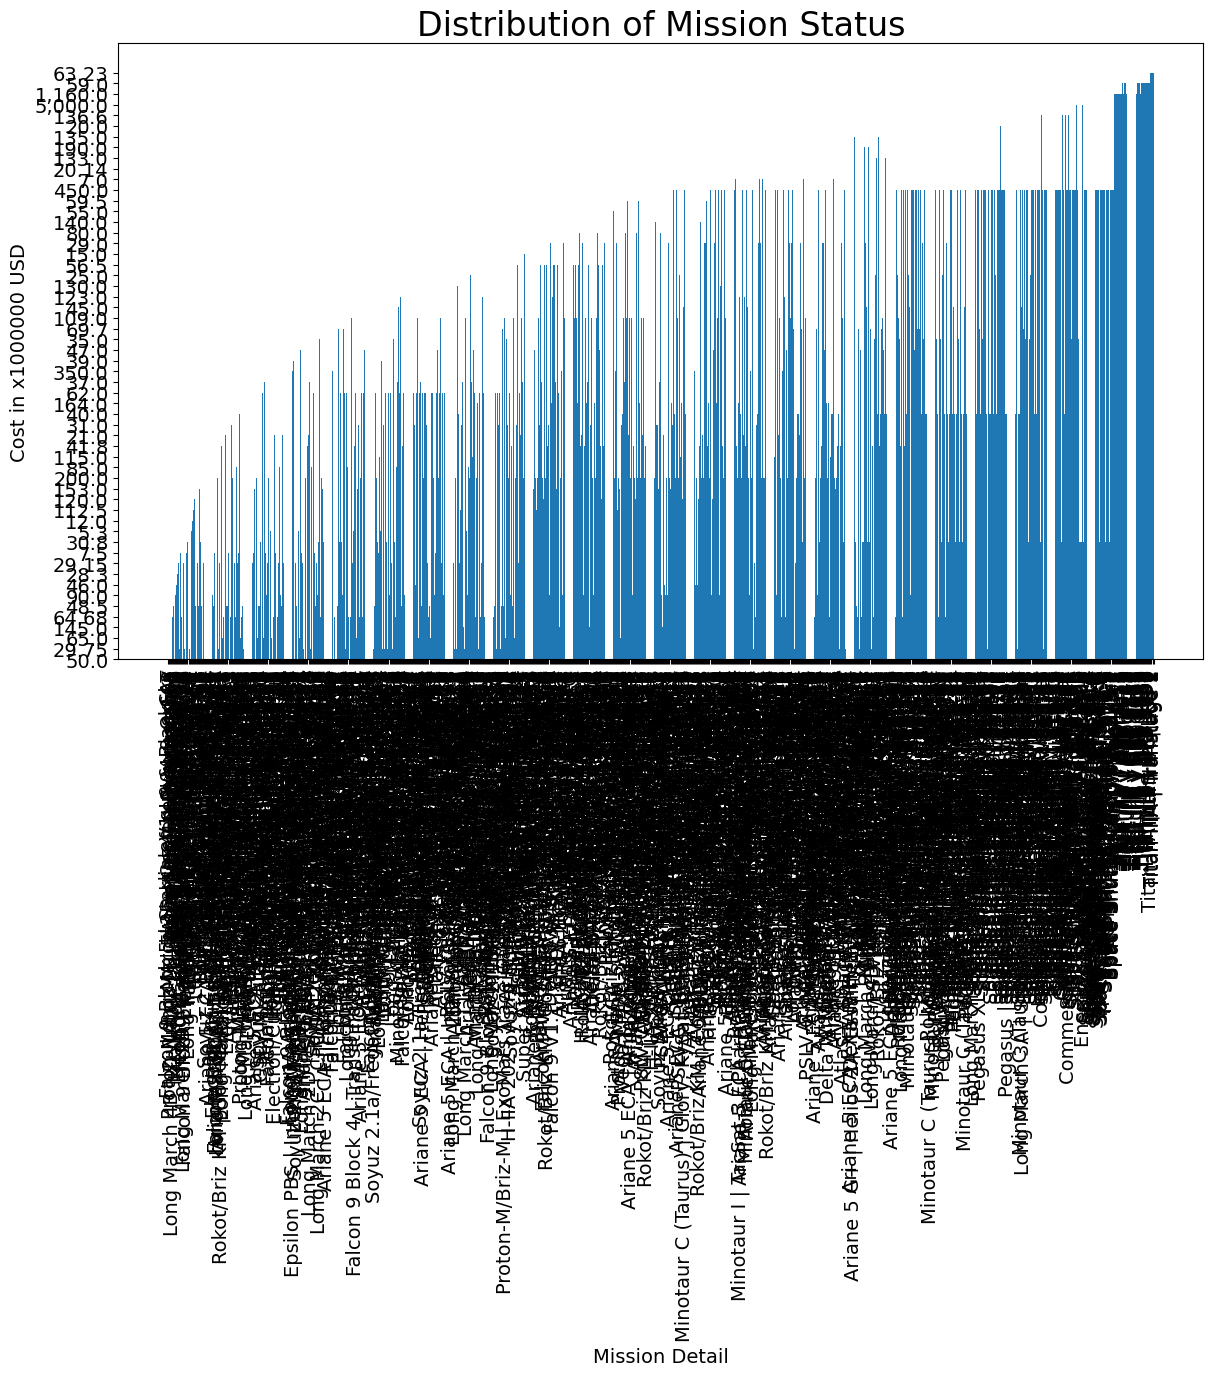

In [24]:
# charting template
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Mission Detail', fontsize=14)
plt.ylabel('Cost in x1000000 USD', fontsize=14)

plt.title('Distribution of Mission Status', fontsize=24)
plt.bar(cost.Detail[:964], cost.Price[:964])

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [25]:
# spit the location, (country name is the last element of the data)
# Extract last element
df_data['last_element'] = df_data['Location'].str.split(',').str[-1].str.strip()
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,last_element
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [26]:
# replace the location data with country name only
replace_dict = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
df_data['country'] = df_data['last_element'].replace(replace_dict)
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,last_element,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Kazakhstan


In [27]:
country_launches = df_data['country'].value_counts().reset_index()
country_launches.columns = ['country', 'launches']
country_launches

,country,launches
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,Iran,14
9,New Zealand,13


In [28]:
# Convertion Extra
# Convert country names to Alpha3 format
for i in range(len(country_launches['country'])):
    try:
        country_name = country_launches['country'][i]
        country = countries.get(country_name)
        if country is not None:
            country_alpha3 = country.alpha3
            country_launches['country'][i] = country_alpha3
        else:
            country_launches['country'][i] = ''
    except KeyError:
        country_launches['country'][i] = ''
country_launches


<ipython-input-28-ed36b97d6991>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_launches['country'][i] = country_alpha3
<ipython-input-28-ed36b97d6991>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_launches['country'][i] = ''


,country,launches
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,,36
8,,14
9,NZL,13


In [29]:
fig = px.choropleth(country_launches, locations='country', locationmode='ISO-3',
                    color='launches', hover_name='country',
                    title='Number of Launches by Country',
                    color_continuous_scale='Viridis')


fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [30]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,last_element,country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Kazakhstan


In [31]:
# iolating failure mission status
failed_df = df_data[df_data['Mission_Status'] == 'Failure']
failed_country = failed_df[['country', 'Mission_Status']]
#
failed_by_country = failed_country[failed_country['Mission_Status'] == 'Failure'].groupby('country').size().reset_index(name='failed_count')
failed_by_country

,country,failed_count
0,Australia,3
1,Brazil,2
2,China,19
3,France,13
4,India,8
5,Iran,8
6,Israel,2
7,Japan,10
8,Kazakhstan,72
9,New Zealand,2


In [32]:
# Convertion Extra
# Convert country names to Alpha3 format
for i in range(len(failed_by_country['country'])):
    try:
        country_name = failed_by_country['country'][i]
        country = countries.get(country_name)
        if country is not None:
            country_alpha3 = country.alpha3
            failed_by_country['country'][i] = country_alpha3
        else:
            failed_by_country['country'][i] = ''
    except KeyError:
        failed_by_country['country'][i] = ''
failed_by_country

<ipython-input-32-0035505291a5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-0035505291a5>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,failed_count
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,,8
6,ISR,2
7,JPN,10
8,KAZ,72
9,NZL,2


In [33]:
fig = px.choropleth(failed_by_country, locations='country', locationmode='ISO-3',
                    color='failed_count', hover_name='country',
                    title='Number of Launches by Country',
                    color_continuous_scale='Viridis')


fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [34]:
sunburst = df_data[['country','Organisation', 'Mission_Status']]
sunburst

,country,Organisation,Mission_Status
0,USA,SpaceX,Success
1,China,CASC,Success
2,USA,SpaceX,Success
3,Kazakhstan,Roscosmos,Success
4,USA,ULA,Success
...,...,...,...
4319,USA,US Navy,Failure
4320,USA,AMBA,Success
4321,USA,US Navy,Failure
4322,Kazakhstan,RVSN USSR,Success


In [35]:
fig = px.sunburst(sunburst, path=['country', 'Organisation', 'Mission_Status'])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
money_matters = df_data[['Organisation', 'Price']]
print(money_matters['Price'].dtype)

object


In [37]:
money_matters['Price'] = money_matters['Price'].replace('[^\d.]', '', regex=True).astype(float)
money_matters['Price'] = money_matters['Price'].astype(float)
money_matters

<ipython-input-37-f041f98cfcd2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-f041f98cfcd2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,SpaceX,50.00
1,CASC,29.75
2,SpaceX,NaN
3,Roscosmos,65.00
4,ULA,145.00
...,...,...
4319,US Navy,NaN
4320,AMBA,NaN
4321,US Navy,NaN
4322,RVSN USSR,NaN


In [38]:
sum_by_name = money_matters.groupby('Organisation')['Price'].sum()
sum_by_name_df = sum_by_name.reset_index()
sum_by_name_df

,Organisation,Price
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arianespace,"16,345.00"
4,Arm??e de l'Air,0.00
5,Blue Origin,0.00
6,Boeing,"1,241.00"
7,CASC,"6,340.26"
8,CASIC,0.00
9,CECLES,0.00


In [39]:
fig = px.bar(sum_by_name_df, x="Price", y="Organisation", orientation='h')
fig.update_layout(
    width=1500,  # Specify the width of the chart in pixels
    height=1000,  # Specify the height of the chart in pixels
)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [40]:
# isolate organisation , detail, price
cost_per_launch = df_data[['Organisation', 'Detail', 'Price']]
cost_per_launch_clean = cost_per_launch.dropna()
cost_per_launch_clean

,Organisation,Detail,Price
0,SpaceX,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,50.0
1,CASC,Long March 2D | Gaofen-9 04 & Q-SAT,29.75
3,Roscosmos,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,65.0
4,ULA,Atlas V 541 | Perseverance,145.0
5,CASC,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",64.68
...,...,...,...
3855,US Air Force,Titan IIIB | KH-8,59.0
3971,US Air Force,Titan IIIA | LES 2 & LCS 1,63.23
3993,US Air Force,Titan IIIA | LES 1,63.23
4000,US Air Force,Titan IIIA | Transtage 2,63.23


In [41]:
fig = px.sunburst(cost_per_launch_clean, path=['Organisation', 'Detail', 'Price'])
fig.show()

# Chart the Number of Launches per Year

In [81]:
df_data2 = pd.read_csv('mission_launches.csv')
df_data2

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [82]:
print(df_data2['Date'].dtype)

object


In [87]:
df_data2['Date'] = pd.to_datetime(df_data2['Date'], utc=True)

In [88]:
df_data2['Date'] = pd.to_datetime(df_data2['Date'])

In [89]:
print(df_data2['Date'].dtype)

datetime64[ns, UTC]


In [90]:
df_data2['Year'] = df_data2['Date'].dt.year

In [109]:
launches_per_year = df_data2.groupby('Year').size()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Length: 64, dtype: int64

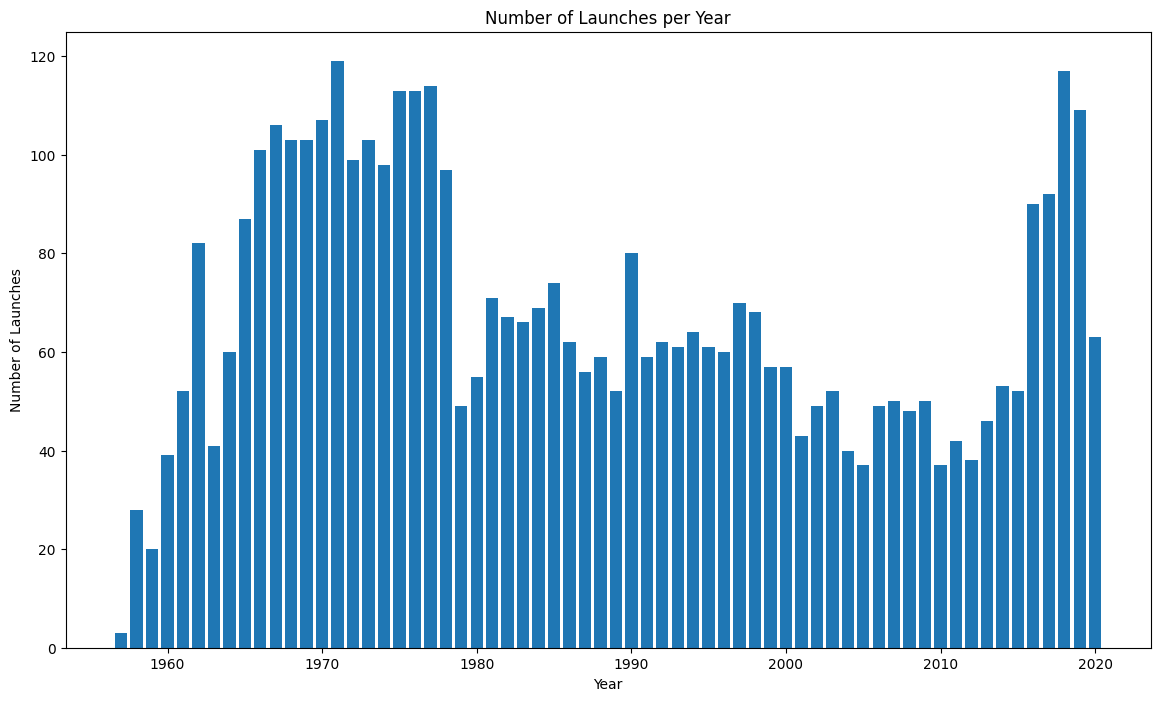

In [113]:
# Set the figure size
plt.figure(figsize=(14,8))

plt.bar(launches_per_year.index, launches_per_year.values)


plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [106]:
df_data2['Month_Year'] = df_data2['Date'].dt.strftime('%b %Y')
df_data2.sort_values('Month_Year', ascending=False, inplace=True)
df_data2

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month_Year
102,102,102,CASC,"Site 95, Jiuquan Satellite Launch Center, China",2019-09-19 06:42:00+00:00,Long March 11 | Zhuhai-1 Group 03,StatusActive,5.3,Success,2019,Sep 2019
99,99,99,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2019-09-25 00:54:00+00:00,Long March 2D | Yunhai-1-02,StatusActive,29.75,Success,2019,Sep 2019
98,98,98,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2019-09-25 13:57:00+00:00,Soyuz FG | Soyuz MS-15 (61S),StatusRetired,NaN,Success,2019,Sep 2019
97,97,97,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2019-09-26 07:46:00+00:00,Soyuz 2.1b/Fregat | Cosmos 2541,StatusActive,48.5,Success,2019,Sep 2019
100,100,100,MHI,"LA-Y2, Tanegashima Space Center, Japan",2019-09-24 16:05:00+00:00,H-IIB | HTV-8,StatusRetired,112.5,Success,2019,Sep 2019
...,...,...,...,...,...,...,...,...,...,...,...
4268,4268,4268,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA",1960-04-01 11:40:00+00:00,Thor DM-18 Able-II | TIROS-1,StatusRetired,NaN,Success,1960,Apr 1960
4288,4288,4288,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1959-04-14 02:49:00+00:00,Vanguard | Vanguard SLV-5,StatusRetired,NaN,Failure,1959,Apr 1959
4289,4289,4289,US Air Force,"SLC-1W (75-3-4), Vandenberg AFB, California, USA",1959-04-13 21:18:00+00:00,Thor-DM18 Agena-A | Discoverer 2,StatusRetired,NaN,Success,1959,Apr 1959
4315,4315,4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,1958,Apr 1958


In [183]:
launch_frequency = df_data2['Month_Year'].value_counts().reset_index()
launch_frequency.columns = ['Date' , 'Frequency']
launch_frequency.Date = pd.to_datetime(launch_frequency.Date, format='%b %Y')
launch_frequency_sorted = launch_frequency.sort_values('Date')
launch_frequency_sorted

,Date,Frequency
720,1957-10-01,1
726,1957-11-01,1
727,1957-12-01,1
697,1958-02-01,2
652,1958-03-01,3
...,...,...
391,2020-04-01,5
120,2020-05-01,9
209,2020-06-01,7
12,2020-07-01,14


In [184]:
# Calculate the rolling average with a window of 3 months
rolling_average = launch_frequency.Frequency.rolling(window=1, center=True).mean()
rolling_average

0     18.00
1     16.00
2     16.00
3     16.00
4     16.00
       ... 
742    1.00
743    1.00
744    1.00
745    1.00
746    1.00
Name: Frequency, Length: 747, dtype: float64

In [ ]:
import plotly.graph_objects as go

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=launch_frequency.Date, y=launch_frequency.Frequency, name='Number of Launches')
])


# Customize the layout
fig.update_layout(
    xaxis=dict(title='Year', tickangle=45, tickformat='%Y-%m', showticklabels=False),
    yaxis=dict(title='Number of Launches'),
    title='Number of Launches per Month'
)

# Show the plot
fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?